In [1]:
import pandas as pd
import numpy as np

# Datasets

In [2]:
# Kiva data
kiva_loans_o = pd.read_csv('kiva-data/kiva_loans.csv')
kiva_mpi_region_locations_o = pd.read_csv('kiva-data/kiva_mpi_region_locations.csv')
loan_theme_ids_o = pd.read_csv('kiva-data/loan_theme_ids.csv')
loan_themes_by_region_o = pd.read_csv('kiva-data/loan_themes_by_region.csv')

# OPHI MPI data
MPI_national_o = pd.read_csv('mpi-data/MPI_national.csv')
MPI_subnational_o = pd.read_csv('mpi-data/MPI_subnational.csv')

# Dataset Cleaning Process

## `kiva_loans`

In [3]:
kiva_loans = kiva_loans_o.copy()
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [4]:
# Times
time_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in time_cols:
    kiva_loans[col] = pd.to_datetime(kiva_loans[col])
    
# Lists
def to_list(strg, sep = ', '):
    if strg == 'nan':
        return []
    return strg.split(sep=sep)

list_cols = ['tags', 'borrower_genders']
for col in list_cols:
    kiva_loans[col] = kiva_loans[col].astype(str).apply(to_list)
    
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
date    

In [5]:
(kiva_loans['posted_time'] - kiva_loans['date']).max()

Timedelta('0 days 23:59:59')

Note that the `date` is just a less precise version of `posted_time`, so `date` can be dropped

In [6]:
kiva_loans.drop('date', axis=1, inplace=True)
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 19 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
dtypes: 

The rest of the dataset looks good, some fields may be unusable/useless, but they can be removed later, since this is the main dataset.

## `kiva_mpi_region_locations`

In [7]:
kiva_mpi_region_locations = kiva_mpi_region_locations_o.copy()
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [8]:
kiva_mpi_region_locations = kiva_mpi_region_locations[pd.notnull(kiva_mpi_region_locations['MPI'])]
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 1007
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             984 non-null object
country         984 non-null object
region          984 non-null object
world_region    984 non-null object
MPI             984 non-null float64
geo             984 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 76.9+ KB


In [9]:
kiva_mpi_region_locations[['geo', 'lat', 'lon']].sample(5)

,geo,lat,lon
737,"(35.80256670000001, 74.9831808)",35.802567,74.983181
33,"(32.1918782, 67.1894488)",32.191878,67.189449
816,"(8.7389416, -11.7979613)",8.738942,-11.797961
392,"(-7.150975, 110.1402594)",-7.150975,110.140259
194,"(1000.0, 1000.0)",NaN,NaN


Note how `geo` is just a more complicated version of `lat` and `lon`, so it can be dropped

In [10]:
kiva_mpi_region_locations.drop('geo', axis=1, inplace=True)
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 1007
Data columns (total 8 columns):
LocationName    984 non-null object
ISO             984 non-null object
country         984 non-null object
region          984 non-null object
world_region    984 non-null object
MPI             984 non-null float64
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(5)
memory usage: 69.2+ KB


## `loan_theme_ids`

In [11]:
loan_theme_ids = loan_theme_ids_o.copy()
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
id                 779092 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [12]:
loan_theme_ids[~pd.notnull(loan_theme_ids['Loan Theme ID'])].sample(10)

,id,Loan Theme ID,Loan Theme Type,Partner ID
431674,1090862,NaN,NaN,NaN
427199,1086387,NaN,NaN,NaN
608863,1269748,NaN,NaN,NaN
535997,1195761,NaN,NaN,NaN
428335,1087523,NaN,NaN,NaN
428417,1087605,NaN,NaN,NaN
428117,1087305,NaN,NaN,NaN
575848,1236164,NaN,NaN,NaN
423656,1082844,NaN,NaN,NaN
424241,1083429,NaN,NaN,NaN


In [13]:
loan_theme_ids = loan_theme_ids_o[pd.notnull(loan_theme_ids_o['Loan Theme ID'])]
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764279 entries, 0 to 779091
Data columns (total 4 columns):
id                 764279 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.2+ MB


## `loan_themes_by_region`

In [14]:
loan_themes_by_region = loan_themes_by_region_o.copy()
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15736 non-null int64
Field Partner Name    15736 non-null object
sector                15736 non-null object
Loan Theme ID         15736 non-null object
Loan Theme Type       15736 non-null object
country               15736 non-null object
forkiva               15736 non-null object
region                15736 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15736 non-null int64
amount                15736 non-null int64
LocationName          15736 non-null object
geocode               13662 non-null object
names                 13661 non-null object
geo                   15736 non-null object
lat                   13662 non-null float64
lon                   13662 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

Any data without a `mpi_region` is useless to us, so we'll drop all rows with null values for that field

In [15]:
loan_themes_by_region = loan_themes_by_region[pd.notnull(loan_themes_by_region['mpi_region'])]
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15722 non-null int64
Field Partner Name    15722 non-null object
sector                15722 non-null object
Loan Theme ID         15722 non-null object
Loan Theme Type       15722 non-null object
country               15722 non-null object
forkiva               15722 non-null object
region                15722 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15722 non-null int64
amount                15722 non-null int64
LocationName          15722 non-null object
geocode               13648 non-null object
names                 13647 non-null object
geo                   15722 non-null object
lat                   13648 non-null float64
lon                   13648 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

In [16]:
loan_themes_by_region[['geocode_old', 'geocode', 'geo', 'lat', 'lon', 'mpi_region', 'mpi_geo']].sample(10)

,geocode_old,geocode,geo,lat,lon,mpi_region,mpi_geo
13426,NaN,"[(27.8930347, -101.4198524)]","(27.8930347, -101.4198524)",27.893035,-101.419852,MEX,NaN
9503,NaN,"[(41.1543112, 75.9056753)]","(41.1543112, 75.9056753)",41.154311,75.905675,KGZ,NaN
6893,NaN,"[(8.529105999999999, 123.74979)]","(8.529105999999999, 123.74979)",8.529106,123.749790,"Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)"
3850,NaN,"[(16.7043941, 121.6083421)]","(16.7043941, 121.6083421)",16.704394,121.608342,"Cagayan Valley, Philippines","(16.9753758, 121.8107079)"
15419,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PER,NaN
1102,"(39.9108333, 69.0063889)","[(39.8772715, 69.02549259999999)]","(39.8772715, 69.02549259999999)",39.877271,69.025493,"Sughd, Tajikistan","(39.5155326, 69.097023)"
5212,NaN,"[(8.611771, 123.716656)]","(8.611771, 123.716656)",8.611771,123.716656,"Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)"
8209,NaN,"[(13.5590229, -88.42827199999999)]","(13.5590229, -88.42827199999999)",13.559023,-88.428272,"Usulutan, El Salvador","(13.4470634, -88.55653099999999)"
1938,NaN,"[(13.7387443, -89.0657027)]","(13.7387443, -89.0657027)",13.738744,-89.065703,"Cuscatlan, El Salvador","(13.8661957, -89.0561532)"
7046,NaN,"[(-0.3688967, 35.286286)]","(-0.3688967, 35.286286)",-0.368897,35.286286,"Western, Kenya","(-0.115003, 34.851379)"


Notice that `geocode` and `geo` are basically indentical, and they are both just more complex versions of `lat` and `lon`, so they can be dropped. `geocode_old` is also pretty useless, since it is mostly empty anyways, so it can also be dropped. `mpi_geo` might not be useful either, but it can be dropped later if need be.

In [17]:
loan_themes_by_region.drop(['geocode_old', 'geocode', 'geo'], axis=1, inplace=True)
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 15735
Data columns (total 18 columns):
Partner ID            15722 non-null int64
Field Partner Name    15722 non-null object
sector                15722 non-null object
Loan Theme ID         15722 non-null object
Loan Theme Type       15722 non-null object
country               15722 non-null object
forkiva               15722 non-null object
region                15722 non-null object
ISO                   15722 non-null object
number                15722 non-null int64
amount                15722 non-null int64
LocationName          15722 non-null object
names                 13647 non-null object
lat                   13648 non-null float64
lon                   13648 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct             14331 non-null float64
dtypes: float64(3), int64(3), object(12)
memory usage: 2.3+ MB


## `MPI_national`

In [18]:
MPI_national = MPI_national_o.copy()
MPI_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ISO                               102 non-null object
Country                           102 non-null object
MPI Urban                         102 non-null float64
Headcount Ratio Urban             102 non-null float64
Intensity of Deprivation Urban    102 non-null float64
MPI Rural                         102 non-null float64
Headcount Ratio Rural             102 non-null float64
Intensity of Deprivation Rural    102 non-null float64
dtypes: float64(6), object(2)
memory usage: 6.5+ KB


## `MPI_subnational`

In [19]:
MPI_subnational = MPI_subnational_o.copy()
MPI_subnational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
ISO country code                     984 non-null object
Country                              984 non-null object
Sub-national region                  984 non-null object
World region                         984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(4), object(4)
memory usage: 61.6+ KB


# Data Cleaning Code (for reseting datasets)

In [20]:
# kiva_loans
kiva_loans = kiva_loans_o.copy()

# Times
time_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in time_cols:
    kiva_loans[col] = pd.to_datetime(kiva_loans[col])
    
# Lists
def to_list(strg, sep = ', '):
    if strg == 'nan':
        return []
    return strg.split(sep=sep)

list_cols = ['tags', 'borrower_genders']
for col in list_cols:
    kiva_loans[col] = kiva_loans[col].astype(str).apply(to_list)

kiva_loans.drop('date', axis=1, inplace=True)

# kiva_mpi_region_locations
kiva_mpi_region_locations = kiva_mpi_region_locations_o.copy()
kiva_mpi_region_locations = kiva_mpi_region_locations[pd.notnull(kiva_mpi_region_locations['MPI'])]
kiva_mpi_region_locations.drop('geo', axis=1, inplace=True)

# loan_theme_ids
loan_theme_ids = loan_theme_ids_o.copy()
loan_theme_ids = loan_theme_ids_o[pd.notnull(loan_theme_ids_o['Loan Theme ID'])]

# loan_themes_by_region
loan_themes_by_region = loan_themes_by_region_o.copy()
loan_themes_by_region = loan_themes_by_region[pd.notnull(loan_themes_by_region['mpi_region'])]
loan_themes_by_region.drop(['geocode_old', 'geocode', 'geo'], axis=1, inplace=True)

# MPI_national
MPI_national = MPI_national_o.copy()

# MPI_subnational
MPI_subnational = MPI_subnational_o.copy()

# Merging datasets

In [21]:
merged_data = kiva_loans.merge(
    loan_theme_ids,
    how='left',
    on='id',
    suffixes=('_kl','_lti')
)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 22 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
Loan The

In [22]:
merged_data = merged_data.merge(
    loan_themes_by_region,
    how='left',
    on=['Loan Theme ID', 'Partner ID', 'region'],
    suffixes=('', '_ltbr')
)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 37 columns):
id                      671205 non-null int64
funded_amount           671205 non-null float64
loan_amount             671205 non-null float64
activity                671205 non-null object
sector                  671205 non-null object
use                     666973 non-null object
country_code            671197 non-null object
country                 671205 non-null object
region                  614405 non-null object
currency                671205 non-null object
partner_id              657698 non-null float64
posted_time             671205 non-null datetime64[ns]
disbursed_time          668809 non-null datetime64[ns]
funded_time             622874 non-null datetime64[ns]
term_in_months          671205 non-null float64
lender_count            671205 non-null int64
tags                    671205 non-null object
borrower_genders        671205 non-null object
repayment_interva

Remove all data without a `mpi_region`, since we need the more granular data.

In [23]:
merged_data = merged_data[pd.notnull(merged_data['mpi_region'])]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 37 columns):
id                      533461 non-null int64
funded_amount           533461 non-null float64
loan_amount             533461 non-null float64
activity                533461 non-null object
sector                  533461 non-null object
use                     533456 non-null object
country_code            533453 non-null object
country                 533461 non-null object
region                  533461 non-null object
currency                533461 non-null object
partner_id              533461 non-null float64
posted_time             533461 non-null datetime64[ns]
disbursed_time          533461 non-null datetime64[ns]
funded_time             499549 non-null datetime64[ns]
term_in_months          533461 non-null float64
lender_count            533461 non-null int64
tags                    533461 non-null object
borrower_genders        533461 non-null object
repayment_interva

In [24]:
(merged_data['sector'] != merged_data['sector_ltbr']).sum()

517133

These columns actually have rather different values, so I will leave both. Let's look at them though, to see if they are actually similar, just formatted differently

In [25]:
merged_data[['sector', 'sector_ltbr']].sample(15)

,sector,sector_ltbr
509602,Retail,General Financial Inclusion
108837,Clothing,General Financial Inclusion
49103,Agriculture,General Financial Inclusion
454322,Agriculture,General Financial Inclusion
367316,Education,General Financial Inclusion
162004,Agriculture,General Financial Inclusion
195278,Agriculture,General Financial Inclusion
592420,Agriculture,General Financial Inclusion
621103,Health,General Financial Inclusion
192232,Food,General Financial Inclusion


In [26]:
temp = merged_data[merged_data['sector_ltbr'] != 'General Financial Inclusion']
temp = temp[temp['sector'] != temp['sector_ltbr']][['sector', 'sector_ltbr']]
temp.sample(10)

,sector,sector_ltbr
273815,Retail,Other
508531,Retail,DSE Direct
586576,Personal Use,Water and Sanitation
357584,Personal Use,Water and Sanitation
595270,Personal Use,Water and Sanitation
537734,Personal Use,Water and Sanitation
587662,Personal Use,Water and Sanitation
350717,Personal Use,Water and Sanitation
239017,Health,Water and Sanitation
114387,Retail,Education


We can see here that many of the rows that don't have "General Financial Inclusion" and that `sector` and `sector_ltbr` don't match, have either "Personal Use" under `sector` or "other" under `sector_ltbr`. Let's see if any data does not follow this trend

In [27]:
temp = temp[temp['sector'] != 'Personal Use']
temp = temp[temp['sector_ltbr'] != 'other']
temp = temp[temp['sector_ltbr'] != 'Other']
temp.sample(10)

,sector,sector_ltbr
197405,Services,Mobile Money and ICT
195374,Services,Mobile Money and ICT
614542,Manufacturing,Water and Sanitation
519033,Education,Clean Energy
109652,Retail,Mobile Money and ICT
179916,Arts,Artisan
211044,Education,Clean Energy
250791,Services,Mobile Money and ICT
440147,Agriculture,Clean Energy
301407,Education,Clean Energy


In [28]:
len(temp)

11348

These last few (11,348) entries have rather conflicting results, so I'll leave both features here for now, but if we want to combine them, it shouldn't be too hard, and we would only lose 11k entries

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 37 columns):
id                      533461 non-null int64
funded_amount           533461 non-null float64
loan_amount             533461 non-null float64
activity                533461 non-null object
sector                  533461 non-null object
use                     533456 non-null object
country_code            533453 non-null object
country                 533461 non-null object
region                  533461 non-null object
currency                533461 non-null object
partner_id              533461 non-null float64
posted_time             533461 non-null datetime64[ns]
disbursed_time          533461 non-null datetime64[ns]
funded_time             499549 non-null datetime64[ns]
term_in_months          533461 non-null float64
lender_count            533461 non-null int64
tags                    533461 non-null object
borrower_genders        533461 non-null object
repayment_interva

In [30]:
(merged_data['Loan Theme Type'] != merged_data['Loan Theme Type_ltbr']).sum()

68

There seems to be some uniqueness within these features, so let's see what they are

In [31]:
merged_data[merged_data['Loan Theme Type'] != merged_data['Loan Theme Type_ltbr']][['Loan Theme Type','Loan Theme Type_ltbr']].drop_duplicates()

,Loan Theme Type,Loan Theme Type_ltbr
70912,Zaf̬n,ZafÍÎn


Since the `_ltbr` version of the dataset has more to do with merging, I will just keep it, but remove the 'lbtr' from the end

In [32]:
merged_data['Loan Theme Type'] = merged_data['Loan Theme Type_ltbr']
merged_data.drop('Loan Theme Type_ltbr', axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 36 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
Loan The

In [33]:
(merged_data['country'] != merged_data['country_ltbr']).sum()

0

These are identical so I can just drop one

In [34]:
merged_data.drop('country_ltbr', axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 35 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
Loan The

The rest of the features contain unique data, so I will just leave them as they are.

Below is the data flow for merging all of the MPI related data, which will later be merged with this main data to create one nice, clean dataset.

In [35]:
mpi_info = kiva_mpi_region_locations.merge(
    MPI_subnational,
    how='outer',
    left_on=['country', 'region', 'world_region'],
    right_on=['Country', 'Sub-national region', 'World region'],
    suffixes=('', '_ms')
)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 16 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
ISO country code                     984 non-null object
Country                              984 non-null object
Sub-national region                  984 non-null object
World region                         984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional 

Remove merged on features `Country`, `Sub-national region`, and `World region`

In [36]:
mpi_info.drop(['Country', 'Sub-national region', 'World region'], axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 13 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
ISO country code                     984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(7), object(6)
memory usage: 107.6+ KB


In [37]:
(mpi_info['ISO'] != mpi_info['ISO country code']).sum()

0

`ISO` and `ISO country code` are identical, so one can be removed

In [38]:
mpi_info.drop('ISO country code', axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 12 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(7), object(5)
memory usage: 99.9+ KB


In [39]:
(mpi_info['MPI'] != mpi_info['MPI Regional']).sum()

0

`MPI` and `MPI Regional` are identical, so one can be removed

In [40]:
mpi_info.drop('MPI', axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 11 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(6), object(5)
memory usage: 92.2+ KB


In [41]:
mpi_info = mpi_info.merge(
    MPI_national,
    how='left',
    left_on=['country', 'ISO'],
    right_on=['Country', 'ISO'],
    suffixes=('', '_mn')
)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 18 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
Country                              984 non-null object
MPI Urban                            984 non-null float64
Headcount Ratio Urban                984 non-null float64
Intensity of Deprivation Urban       984 non-null float64
MPI Rural                      

Again, drop the columns that were merged on from the second dataset (not `ISO` since it was identical and there is still only 1 column with that value)

In [42]:
mpi_info.drop(['Country'], axis=1, inplace=True)

In [43]:
mpi_info[[key for key in mpi_info.keys() if 'mpi' in key.lower()]].sample(5)

,MPI National,MPI Regional,MPI Urban,MPI Rural
369,0.248,0.391,0.112,0.341
542,0.357,0.547,0.113,0.396
657,0.303,0.583,0.132,0.416
917,0.284,0.296,0.122,0.351
673,0.303,0.080,0.132,0.416


Notice that all features with *'mpi'* in the name are different, so they are all good to stay

In [44]:
mpi_info[[key for key in mpi_info.keys() if 'head' in key.lower()]].sample(5)

,Headcount Ratio Regional,Headcount Ratio Urban,Headcount Ratio Rural
974,3.8,8.7,46.27
955,51.5,19.0,57.72
632,74.3,20.3,61.46
817,5.5,2.4,12.51
668,23.7,28.1,69.98


The same goes for the features with *'head'* in the name

In [45]:
mpi_info[[key for key in mpi_info.keys() if 'intensity' in key.lower()]].sample(5)

,Intensity of deprivation Regional,Intensity of Deprivation Urban,Intensity of Deprivation Rural
948,46.1,42.1,52.7
608,47.0,42.4,47.0
212,35.5,37.2,42.6
445,41.9,43.6,47.5
890,40.0,36.3,41.3


And the same for *'intensity'*

So this is the final dataset for all MPI information, so now it's time to merge it with the main dataset. First, I want to convert the features into `snake_case` because this is python, and also what I prefer

In [46]:
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 17 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
MPI Urban                            984 non-null float64
Headcount Ratio Urban                984 non-null float64
Intensity of Deprivation Urban       984 non-null float64
MPI Rural                            984 non-null float64
Headcount Ratio Rural         

In [47]:
snake_case = lambda colname: colname.lower().replace(' ','_')
mpi_info.rename(snake_case, axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 17 columns):
locationname                         984 non-null object
iso                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
mpi_national                         984 non-null float64
mpi_regional                         984 non-null float64
headcount_ratio_regional             984 non-null float64
intensity_of_deprivation_regional    983 non-null float64
mpi_urban                            984 non-null float64
headcount_ratio_urban                984 non-null float64
intensity_of_deprivation_urban       984 non-null float64
mpi_rural                            984 non-null float64
headcount_ratio_rural         

I'll do the same to `merged_data` before joining the last 2 datasets

In [309]:
snake_case = lambda colname: colname.lower().replace(' ','_')
merged_data.rename(snake_case, axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 35 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
loan_the

In [310]:
final_data = merged_data.merge(
    mpi_info,
    how='left',
    left_on='mpi_region',
    right_on='locationname',
    suffixes=('', '_mi')
)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 52 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

Remove `locationname_mi`, since it was merged on

In [311]:
final_data.drop('locationname_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 51 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [312]:
(final_data['country'] != final_data['country_mi']).sum()

95476

A good amount of the data has different values for these features, let's take a closer look

In [313]:
temp = final_data[final_data['country'] != final_data['country_mi']]
temp.sample(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,mpi_national,mpi_regional,headcount_ratio_regional,intensity_of_deprivation_regional,mpi_urban,headcount_ratio_urban,intensity_of_deprivation_urban,mpi_rural,headcount_ratio_rural,intensity_of_deprivation_rural
268226,1020901,2850.0,2850.0,Retail,Retail,"to purchase pants, skirts, blouses, shirts, an...",MX,Mexico,"San Miguel Soyaltepec, Oaxaca",MXN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456758,1247047,1150.0,1150.0,Farm Supplies,Agriculture,"to buy quality fertilizers, seeds and other fa...",MM,Myanmar (Burma),Pakokku,MMK,...,0.134,0.134,31.6,42.6,0.040,9.6,41.7,0.168,37.46,44.8
174556,910358,6100.0,6100.0,Clothing,Clothing,to buy socks.,MX,Mexico,San Agustin San Felipe del Progreso,MXN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240100,987778,475.0,475.0,Personal Housing Expenses,Housing,to build a latrine o improve the health of her...,VN,Vietnam,"Le Thuy, Quang Binh",VND,...,0.029,0.024,6.3,38.8,0.013,3.6,36.9,0.036,8.79,41.4
289768,1044640,4425.0,4425.0,Food Stall,Food,to buy coffee and other products.,PY,Paraguay,Ciudad del Este,PYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193038,932810,475.0,475.0,Fish Selling,Food,to build a special fish residence and start se...,GE,Georgia,Ghari,GEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198415,939479,425.0,425.0,Food,Food,to purchase snacks and juices to resell.,GE,Georgia,Zugdidi,GEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209319,952538,300.0,300.0,Restaurant,Food,to stock up her restaurant.,MX,Mexico,Nicolas Romero,MXN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509425,1306147,475.0,475.0,Personal Housing Expenses,Housing,to build a latrine to improve the health of he...,VN,Vietnam,"Bo Trach, Quang Binh",VND,...,0.029,0.024,6.3,38.8,0.013,3.6,36.9,0.036,8.79,41.4
266187,1018317,575.0,575.0,Food Stall,Food,to restock the out of stock items for her food...,TZ,Tanzania,Dar es Salaam,TZS,...,0.284,0.143,30.5,46.9,0.122,27.7,44.3,0.351,68.56,51.2


Since country_mi is NaN often, let's only check when that isn't true

In [314]:
temp = temp[pd.notnull(temp['country_mi'])][['country','country_mi']]
temp.drop_duplicates()

,country,country_mi
35,Tanzania,"Tanzania, United Republic of"
192,Bolivia,"Bolivia, Plurinational State of"
458,Vietnam,Viet Nam
1665,The Democratic Republic of the Congo,"Congo, Democratic Republic of the"
59866,Myanmar (Burma),Myanmar


All of the other cases just have alternate spellings, so dropping `country_mi` should cause no issues

In [315]:
final_data.drop('country_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 50 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [316]:
(final_data['mpi_region'] != final_data['region_mi']).sum()

533461

I have a strong feeling that `region_mi` is a substring of `mpi_region`, so let's see how often that is the case

In [317]:
vecin = np.vectorize(str.__contains__)
temp = final_data[['mpi_region', 'region_mi']].dropna()
(~vecin(temp['mpi_region'], temp['region_mi'])).sum()

0

This means that `region_mi` is always in `mpi_region`, so we can remove `region_mi` because it contains less info, right? Take a look at the data however

In [318]:
temp.sample(10)

,mpi_region,region_mi
235636,"Kaduna, Nigeria",Kaduna
158252,"Esteli, Nicaragua",Esteli
189093,"Central Visayas, Philippines",Central Visayas
722,"Leon, Nicaragua",Leon
437143,"Otdar Mean Chey, Cambodia",Otdar Mean Chey
456913,"Valle, Honduras",Valle
495050,"Central Visayas, Philippines",Central Visayas
403297,"Punjab, Pakistan",Punjab
510435,"Banteay Mean Chey, Cambodia",Banteay Mean Chey
348879,"Mountains, Ecuador",Mountains


If I add the country to this data, it should be even more clear

In [319]:
temp = final_data[['mpi_region', 'region_mi', 'country']].dropna()
temp.sample(10)

,mpi_region,region_mi,country
365003,"Itasy, Madagascar",Itasy,Madagascar
217925,"Santa Cruz, Bolivia, Plurinational State of",Santa Cruz,Bolivia
174078,"Morazan, El Salvador",Morazan,El Salvador
303947,"Khatlon, Tajikistan",Khatlon,Tajikistan
484753,"Barranquilla A. M., Colombia",Barranquilla A. M.,Colombia
22058,"Central Visayas, Philippines",Central Visayas,Philippines
193655,"Red River Delta, Viet Nam",Red River Delta,Vietnam
296841,"La Paz, Bolivia, Plurinational State of",La Paz,Bolivia
256304,"Western, Kenya",Western,Kenya
400105,"Eastern Visayas, Philippines",Eastern Visayas,Philippines


So it is better to keep `region_mi` over `mpi_region`, however I will change the names so it makes a little more sense. Later I realized that `region_mi` had some NaNs, so instead of just renaming, if `region_mi` is NaN, it takes the value from `mpi_region`

In [320]:
final_data['mpi_region'] = final_data['region_mi'].fillna(final_data['mpi_region'])
final_data.drop('region_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 49 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [321]:
final_data[['lat_mi', 'lon_mi', 'mpi_geo']].sample(10)

,lat_mi,lon_mi,mpi_geo
415937,11.004107,-74.806981,"(11.0041072, -74.80698129999999)"
193169,10.296856,123.888677,"(10.2968562, 123.8886774)"
473741,-0.115003,34.851379,"(-0.115003, 34.851379)"
291811,-1.469302,-78.816940,"(-1.4693018, -78.8169396)"
139828,-25.891968,32.605135,"(-25.891968, 32.6051351)"
73278,38.559772,68.787038,"(38.5597722, 68.7870384)"
288462,-4.062741,39.677148,"(-4.0627412, 39.6771481)"
358898,33.729388,73.093146,"(33.7293882, 73.0931461)"
86838,-0.205172,-78.489694,"(-0.2051725, -78.4896935)"
373762,-13.531950,-71.967463,"(-13.53195, -71.96746259999999)"


As you can see here, `lat_mi` and `lon_mi` is just the decomposed information from `mpi_geo`, so we can drop `mpi_geo`. I will also rename the other features to `mpi_region_lat` and `mpi_region_lon` to make it a little more clear

In [322]:
final_data['mpi_region_lat'] = final_data['lat_mi']
final_data['mpi_region_lon'] = final_data['lon_mi']
final_data.drop(['mpi_geo', 'lat_mi', 'lon_mi'], axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 48 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

# Adding features

In [323]:
def ior(i):
    i = iter(i)
    try:
        s = next(i)
    except StopIteration:
        return None
    for e in i:
        s = s | e
    return s

all_tags = ior(final_data['tags'].apply(set))
all_tags

{'#Animals',
 '#Biz Durable Asset',
 '#Eco-friendly',
 '#Elderly',
 '#Fabrics',
 '#Female Education',
 '#First Loan',
 '#Health and Sanitation',
 '#Hidden Gem',
 '#Inspiring Story',
 '#Interesting Photo',
 '#Job Creator',
 '#Low-profit FP',
 '#Orphan',
 '#Parent',
 '#Post-disbursed',
 '#Refugee',
 '#Repair Renew Replace',
 '#Repeat Borrower',
 '#Schooling',
 '#Single',
 '#Single Parent',
 '#Supporting Family',
 '#Sustainable Ag',
 '#Technology',
 '#Tourism',
 '#Trees',
 '#Unique',
 '#Vegan',
 '#Widowed',
 '#Woman Owned Biz',
 'user_favorite',
 'user_like',
 'volunteer_like',
 'volunteer_pick'}

In [324]:
vecin = np.vectorize(list.__contains__)

for tag in all_tags:
    final_data['tag_' + tag] = vecin(final_data['tags'], tag).astype(int)

In [325]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 83 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [326]:
veclen = np.vectorize(list.__len__)

final_data['num_tags'] = veclen(final_data['tags'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 84 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [327]:
final_data.drop('tags', axis=1, inplace=True)
final_data[[key for key in final_data.keys() if 'tag' in key]].sample(10)

,tag_#Female Education,tag_#Fabrics,tag_#Orphan,tag_#Widowed,tag_#Woman Owned Biz,tag_#Elderly,tag_#Schooling,tag_#Hidden Gem,tag_#Trees,tag_#Job Creator,...,tag_#Interesting Photo,tag_#Parent,tag_#Animals,tag_user_like,tag_#First Loan,tag_#Health and Sanitation,tag_#Low-profit FP,tag_#Tourism,tag_volunteer_like,num_tags
131609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473519,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
122153,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
275736,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,5
332575,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
462812,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
206926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
374965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
320568,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4


In [328]:
final_data['num_male_borrowers'] = final_data['borrower_genders'].apply(lambda x: x.count('male'))
final_data['num_female_borrowers'] = veclen(final_data['borrower_genders']) - final_data['num_male_borrowers']
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 85 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [329]:
final_data['time_till_funded'] = final_data['funded_time'] - final_data['posted_time']
final_data['hours_till_funded'] = final_data['time_till_funded'].astype('timedelta64[h]')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [330]:
final_data.drop(['tags', 'borrower_genders'], axis=1, inplace=True)

In [331]:
final_data[~pd.notnull(final_data['hours_till_funded'])].sample(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tag_#First Loan,tag_#Health and Sanitation,tag_#Low-profit FP,tag_#Tourism,tag_volunteer_like,num_tags,num_male_borrowers,num_female_borrowers,time_till_funded,hours_till_funded
527694,1327415,50.0,900.0,Farming,Agriculture,to pay for farming essentials like fertilizers...,MM,Myanmar (Burma),Mahlaing,MMK,...,0,0,0,0,0,2,1,5,NaT,NaN
92906,796981,350.0,450.0,Home Products Sales,Retail,to buy more Tupperware products to sell to inc...,PH,Philippines,"Oroquieta City, Misamis Occidental",PHP,...,0,0,0,0,0,4,0,1,NaT,NaN
79993,777409,625.0,950.0,Retail,Retail,"buy clothes, posho, lamps, and batteries",UG,Uganda,Rukoki,UGX,...,0,0,0,0,0,4,0,1,NaT,NaN
169677,903885,1075.0,1125.0,Fish Selling,Food,to purchase more dried fish to sell in her stall,PH,Philippines,"Roxas City, Capiz",PHP,...,0,0,0,0,0,4,0,1,NaT,NaN
170873,905679,475.0,600.0,Clothing Sales,Clothing,to buy women's clothing.,NI,Nicaragua,Granada,USD,...,0,0,0,0,0,5,0,1,NaT,NaN
441028,1229063,1075.0,1500.0,Barber Shop,Services,to buy barber shop supplies and make some deco...,PS,Palestine,"Khanyounis, Gaza Strip",USD,...,0,0,0,0,0,10,1,0,NaT,NaN
72524,766000,525.0,1175.0,General Store,Retail,to buy more grocery items,UG,Uganda,Kachwamba,UGX,...,0,0,0,0,0,1,1,0,NaT,NaN
464210,1255316,625.0,1100.0,Farming,Agriculture,to buy fertilizer and other products for her s...,MM,Myanmar (Burma),Monywa,MMK,...,0,0,0,0,0,4,0,5,NaT,NaN
158818,889854,375.0,1000.0,Personal Housing Expenses,Housing,to buy construction materials to renovate her ...,TJ,Tajikistan,Zafarabad,USD,...,0,0,0,0,0,2,0,1,NaT,NaN
215147,959237,200.0,500.0,Cereals,Food,to buy more beans and maize to sell.,KE,Kenya,Kibwezi,KES,...,0,0,0,0,0,3,1,0,NaT,NaN


It looks like the entries that are lacking a `funded_time` actually have not been fully funded yet (or will never be funded). This will be helpful for generating a good metric to determine the Public Perception of the welfare/poverty level of the borrower. These NaNs have to be filled however, in a way that won't ruin the data. Let's take a look at just the time values within this dataset.

In [332]:
final_data[~pd.notnull(final_data['hours_till_funded'])][['funded_time', 'posted_time', 'disbursed_time']].sample(10)

,funded_time,posted_time,disbursed_time
211797,NaT,2015-09-29 09:15:42,2015-09-17 07:00:00
164735,NaT,2015-06-06 05:34:45,2015-05-08 07:00:00
443229,NaT,2017-02-03 03:37:58,2017-01-05 08:00:00
88881,NaT,2014-10-29 08:51:49,2014-10-15 07:00:00
173277,NaT,2015-06-26 03:20:00,2015-06-25 07:00:00
401200,NaT,2016-11-12 11:28:04,2016-10-17 07:00:00
163319,NaT,2015-06-03 11:51:31,2015-05-04 07:00:00
395233,NaT,2016-10-30 09:31:05,2016-10-24 07:00:00
176434,NaT,2015-07-03 01:57:28,2015-06-11 07:00:00
207649,NaT,2015-09-21 02:10:28,2015-09-11 07:00:00


So it looks like these loans were actually distributed before they were posted (or at least a portion of the loans), so computing a funding velocity is not really possible. What could be useful here is to use the maximum amount of hours required to fund a particular amount of money, and plot those results to see if there are any trends 

In [333]:
data = final_data[['loan_amount', 'hours_till_funded']].dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499549 entries, 0 to 533452
Data columns (total 2 columns):
loan_amount          499549 non-null float64
hours_till_funded    499549 non-null float64
dtypes: float64(2)
memory usage: 11.4 MB


In [334]:
maxes = data.groupby('loan_amount').max()
maxes.sample(10)

,hours_till_funded
loan_amount,
1425.0,1675.0
1725.0,1644.0
1575.0,1362.0
4075.0,1466.0
4875.0,1063.0
9225.0,752.0
10025.0,145.0
9875.0,789.0
1925.0,1538.0


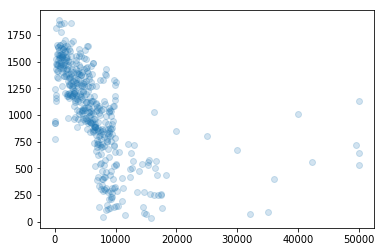

In [335]:
X = maxes.index
y = maxes['hours_till_funded']
plt.scatter(X, y, alpha=0.2)
plt.show()

It's interesting to see that downward trend. Although this is only maximums, it could shed light onto some issue Kiva has with promoting some of the loans that require more money, rather than promoting the loans for people who really need it. Let's take a look at the average and minimums as well, just to get an idea.

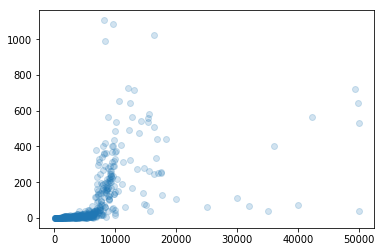

In [336]:
loan_groups = data.groupby('loan_amount')
mins = loan_groups.min()
means = loan_groups.mean()

plt.scatter(mins.index, mins['hours_till_funded'], alpha=0.2)
plt.show()

This minimums looked just about as I expected, with the minimums following a sort of exponential function. Smaller loans are bound to be able to be funded faster than bigger loans, so this makes sense

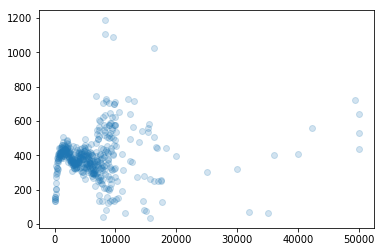

In [337]:
plt.scatter(means.index, means['hours_till_funded'], alpha=0.2)

Now the mean looks odd and intriguing. It has this sharp rise, then slowly fluctuates in a downward trend, which is odd considering there is no normalization. This indicates that some of the larger loans are simply being funded faster than smaller loans. Let's see if this just has to do with the number of loans in each bucket.

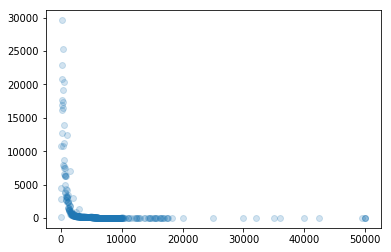

In [338]:
counts = loan_groups.count()

plt.scatter(counts.index, counts['hours_till_funded'], alpha=0.2)
plt.show()

This looks as expected. Maybe the average funding velocity (loan_amount/hours_till_funded) can give insights into the odd shape of the average funding time.

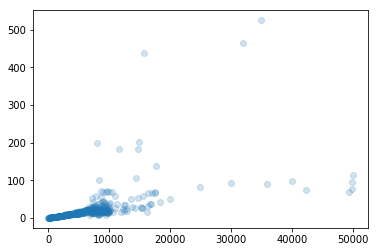

In [339]:
plt.scatter(means.index, means.index/means['hours_till_funded'], alpha=0.2)
plt.show()

So this is a very interesting graph. It implies that people tend to fund larger loans faster than smaller loans. This could be due to the amount of loans at each loan amount. If a lender lends money to one project from each price range, then it's obvious that due to the fact that there are fewer large loans, that they would get funded more. Still, this could be viewed as an issue, especially if Kiva wants the money to go to those who need it the most.

Now back to the task of populating the NaNs for the `hours_till_funded` feature, since we want a way to represent that this loan never got fully funded, but do so in a way that just makes the data significant, rather than leave them as NaN or give each of the loans that didn't get funded some arbitrarily large about of time to get funded. This is important so that whatever model we generate treates outliers locally rather than globally. I don't want the model to see the data and say "Oh wow look at these outliers", I want it to see the data as a whole have no particular outliers, but when looking at a subset of the data, see outliers. What I plan on doing is computing the average funding velocity (of the loans which I can compute one) for a particular loan size (using LinearRegression), the use it to compute a prospective `expected_hours_till_funded`. I will then, under the assumption that the loan reached the amount it was funded when it reached the expected hours till funded, divide the expected hours by the percent of the loan that was funded for all of the loans that weren't fully funded, and use this new value as the hours till funded. Depending on the data, I might also give this value a little nudge by introducing a coefficient to raise the amount of hours a little more.

In [340]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X = means.index.values.reshape(-1, 1)
y = (means.index/means['hours_till_funded'])

lin_reg.fit(X[:100], y[:100])
preds = lin_reg.predict(X)

The reason that I am only using part of the data to fit the linear regression is to ensure that the intercept is positive. Otherwise the smaller loans get a negative expected funing velocity, which isn't very useful

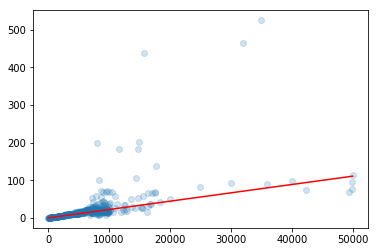

In [341]:
plt.scatter(X, y, alpha=0.2)
plt.plot(X, preds, c='r')

Although this might not be perfect, especially for higher values, it should be a rather good way to predict how long a certain loan should take, based on how large that loan is. And even though this line only takes into account the first 100 loan amounts, it still produces line that fits the data rather well.

In [342]:
lin_reg.coef_[0], lin_reg.intercept_

(0.0022150186161036447, 0.27150944584848746)

In [343]:
f = lambda x: lin_reg.coef_[0]*x + lin_reg.intercept_

final_data['expected_funding_velocity'] = final_data['loan_amount'].apply(f)
final_data['expected_hours_till_funded'] = final_data['loan_amount']/final_data['expected_funding_velocity']

In [344]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 88 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [345]:
final_data['percent_funded'] = final_data['funded_amount']/final_data['loan_amount']
final_data['fully_funded'] = final_data['funded_amount'] >= final_data['loan_amount']

In [346]:
final_data['hours_till_funded'] = final_data['hours_till_funded'].fillna(final_data['expected_hours_till_funded']/final_data['percent_funded'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 90 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

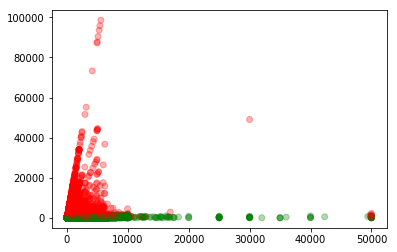

In [347]:
colors = ('r', 'g')
get_c = lambda i: colors[i]
inst_cols = final_data['fully_funded'].apply(get_c)
plt.scatter(final_data['loan_amount'], final_data['hours_till_funded'], c=inst_cols, alpha=0.3)
plt.show()

Here you can see that the red points in the data contain the values which we populated. This data might be a little concerning, given by how skewed the data is, but the point is for the loans that were not fully funded to be casted as outliers, but in an intelligent way, rather than just giving them some arbitrary value. Regardless, these outliers are a little high in comparison, and could potentially cause some issues later when trying to fit a model, so let's scale down the red data (in this case, by a factor of 12).

In [348]:
final_data['hours_till_funded'] = final_data['hours_till_funded']/((~final_data['fully_funded'])*11 + 1)

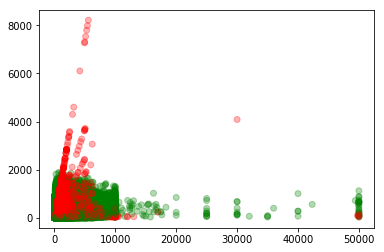

In [349]:
plt.scatter(final_data['loan_amount'], final_data['hours_till_funded'], c=inst_cols, alpha=0.3)
plt.show()

These values are a lot more reasonable. If you look at the maximum on this graph, it claims that `hours_till_funded` is just under a year (~11.5 months), which is significantly less ridiculous than the 10+ years that it was before, so I'm happy with this data.

Now we can compute individual funding velocities, and plot them out.

In [350]:
final_data['funding_velocity'] = final_data['loan_amount']/final_data['hours_till_funded']

Something I noticed here is that some of the new `hours_till_funded` values I filled in are `inf` because the loan was not funded at all. Although this isn't very useful, the resulting funding_velocity is 0, so the math has the potential to work out really well, depending on the formula used to create the PPI once the data is fully prepared for modelling. 

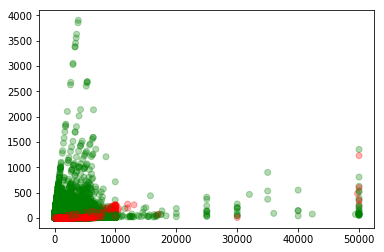

In [351]:
plt.scatter(final_data['loan_amount'], final_data['funding_velocity'], c=inst_cols, alpha=0.3)
plt.show()

Here, you can see that pretty much all of the red points have a rather low funding velocity, which was the intention of the formula used to fill in these null values. You can also see the slight upward trend like in the averages, which is a good indication that this data we added will work well with the model. Something else to notice is that quite a few of the filled in values seem rather normal. This ideally indicates that the loan was nearly funded, so rather than placing a significant marker on that data (like an infinite or really large hours_till_funded), the formula created a more reasonable guess as to what it might have been.

Let's take a look at what else we need to fill in before applying some sort of model

In [352]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 91 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

The first feature I can see in this list is `use` which is a user input string. Now this could be used with NLP in order to extract some potentially useful metrics, but that's a little out of the scope of my abilities and knowledge, so we can just get rid of it, and not deal with it.

In [353]:
final_data.drop('use', axis=1, inplace=True)

The next feature that isn't completely populated is `country_code`. Considering that the `country` feature is fully populated, I see no issues with dropping this feature.

In [354]:
final_data.drop('country_code', axis=1, inplace=True)

After this, the next feature is `funded_time`. Although this will be removed eventually (since ML algorithms won't know what to do with a DateTime object), I will leave it in case I want to compute something else with it.

After this we have the field `names`. I have no idea what data this holds, so let's take a look.

In [355]:
final_data['names'].sample(10)

214734                      Msambweni; Kwale County; Kenya
530163                  Togo; Lome; Golfe; Maritime Region
186502    Oratorio; PÍ©rez ZeledÍ_n; San JosÍ©; Costa Rica
226237          San Ignacio; Misiones Department; Paraguay
405714    Pakokku; Pakokku; Magway Region; Myanmar (Burma)
300495                      Luwero; Central Region; Uganda
105624     Guindulman; Bohol; Central Visayas; Philippines
268549                              Khordha; Odisha; India
195860        Dumarao; Capiz; Western Visayas; Philippines
59037       San Miguel; San Miguel Department; El Salvador
Name: names, dtype: object

So it looks like this is some sort of alternate names for the region/country for the loan or whatnot, which is not really helpful, considering how hectic these look like, so it can be dropped

In [356]:
final_data.drop('names', axis=1, inplace=True)

In [357]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 88 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

The next features that are not fully populated are `lat` and `lon`. Now this could be useful to generate some interesting metrics, however I don't have any ideas that would be useful for this project, so they can be dropped without any real problems

In [358]:
final_data.drop(['lat', 'lon'], axis=1, inplace=True)

Then next feature with null values is `rural_pct`, which I believe is a percentage of the nation which is rural. Let's see what sort of data the locations with NaNs have.

In [359]:
final_data[~pd.notnull(final_data['rural_pct'])]

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,...,num_tags,num_male_borrowers,num_female_borrowers,time_till_funded,hours_till_funded,expected_funding_velocity,expected_hours_till_funded,percent_funded,fully_funded,funding_velocity
74,653415,4000.0,4000.0,Cosmetics Sales,Retail,United States,San Diego,USD,249.0,2014-01-02 21:52:39,...,4,0,1,14 days 22:04:00,358.000000,9.131584,438.040108,1.000000,True,11.173184
257,653636,600.0,600.0,Cosmetics Sales,Retail,Kenya,Nairobi West,KES,138.0,2014-01-03 09:50:47,...,6,0,1,16 days 05:45:56,389.000000,1.600521,374.878020,1.000000,True,1.542416
263,653604,700.0,700.0,Beauty Salon,Services,Kenya,Nairobi West,KES,138.0,2014-01-03 09:01:37,...,4,0,1,16 days 02:10:15,386.000000,1.822022,384.188455,1.000000,True,1.813472
277,653681,475.0,475.0,Retail,Retail,Kenya,Nairobi West,KES,138.0,2014-01-03 11:36:18,...,0,0,1,2 days 02:51:31,50.000000,1.323643,358.858013,1.000000,True,9.500000
279,653669,600.0,600.0,Dairy,Agriculture,Kenya,Nairobi West,KES,138.0,2014-01-03 11:13:58,...,0,0,1,0 days 11:11:09,11.000000,1.600521,374.878020,1.000000,True,54.545455
293,653697,350.0,350.0,Personal Expenses,Personal Use,Kenya,malindi,KES,138.0,2014-01-03 13:16:45,...,2,0,1,0 days 10:52:51,10.000000,1.046766,334.363184,1.000000,True,35.000000
294,653703,600.0,600.0,Grocery Store,Food,Kenya,Kiambu,KES,138.0,2014-01-03 13:58:12,...,3,0,1,6 days 11:20:47,155.000000,1.600521,374.878020,1.000000,True,3.870968
298,653696,600.0,600.0,Personal Expenses,Personal Use,Kenya,malindi,KES,138.0,2014-01-03 13:08:07,...,0,0,1,0 days 12:35:56,12.000000,1.600521,374.878020,1.000000,True,50.000000
303,653707,600.0,600.0,Retail,Retail,Kenya,Kericho,KES,138.0,2014-01-03 14:39:33,...,2,1,0,26 days 14:01:41,638.000000,1.600521,374.878020,1.000000,True,0.940439
305,653692,600.0,600.0,Dairy,Agriculture,Kenya,Kericho,KES,138.0,2014-01-03 12:40:48,...,3,1,0,13 days 14:41:36,326.000000,1.600521,374.878020,1.000000,True,1.840491


Now this is the first feature with potentially useful data that has null values which can't really be filled very easily.